# Final Project: Thyroid Disease Diagnosis

>Names: Gabi Rivera, Joel Day, and Marvin Moran
>
>Date: 01Oct2023
>
>Course: ADS505

### Problem Statement
Thyroid diseases such as hypothyroidism and hyperthyroidism pose a significant health concern globally, with their prevalence on the rise. Despite being among the most common hormone imbalance diseases, there is a notable absence of proactive research and diagnostic tools to assess individual risk levels for thyroid disorders. This gap in medical research and care hinders the ability to provide timely interventions and preventative measures, resulting in individuals often seeking medical attention only after experiencing symptoms or complications. Consequently, there is a pressing need for the development of a machine learning-based predictive tool that can assess an individual's risk for thyroid disorders, thereby enabling early intervention and personalized recommendations for healthcare.

### Justification
This type of project is supported by 5 key factors. First and foremost, the prevalance for the target disease type is on the rise. In turn, classifying its variant forms as a substantial public health concern. The prevalence of these conditions is observed not only across different age groups but also in both males and females. Thus, setting a presedence of high importance and substantial humanitarian benefit in return. Second, the proactive research for the target disease type is limited. Despite the growing incidence of thyroid diseases rising, there is a significant lack of proactive research in the field. Third, such a project can greatly highlight the potential machine learning has to offer. The field of data science can transform the field of medical research as it has done for numerous other professional fields. Fourth, the potential capabilties that will result from the project (e.g., automated diagnosis) offers tremendous business opportunities. From a business perspective, such a predictive tool can be monetized through various avenues, including advertising, pharmaceutical sales related to thyroid medication, and future contract opportunities. Fifth, and ultimately, the end-result of project has the potential to greatly improve the access to healthcare for individuals. By offering individuals an easy-to-use tool to self-assess their thyroid disorder risk, they can become convinced  to seek medical attention before symptoms worsen. This could lead to earlier diagnoses and more effective treatments, ultimately improving healthcare outcomes.

### Imported Packages

In [1]:
!pip install klib
!pip install GitPython
!pip install dython
!pip install kds
!pip install keras-sequential-ascii

import pandas as pd
import numpy as np
import git
import klib
import seaborn as sns
import matplotlib.pyplot as plt
import kds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import pydot
from tensorflow.keras.layers import Input, Dense
from keras_sequential_ascii import sequential_model_to_ascii_printout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotNormal

from dython.nominal import associations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
def download_github_repository(repo_url, destination_folder):
    try:
        git.Git(destination_folder).clone(repo_url)
        print(f"Repository successfully downloaded to {destination_folder}")
    except git.exc.GitCommandError as e:
        print(f"Error downloading the repository: {e}")

In [3]:
repo_owner = 'Riverag0011'
repo_name = 'ADS505_Team-4'
repository_url = f"https://github.com/{repo_owner}/{repo_name}"
destination_folder = "/content/sample_data"
download_github_repository(repository_url, destination_folder)

Error downloading the repository: Cmd('git') failed due to: exit code(128)
  cmdline: git clone https://github.com/Riverag0011/ADS505_Team-4
  stderr: 'fatal: destination path 'ADS505_Team-4' already exists and is not an empty directory.'


### Import Dataset:

In [4]:
csv_name = 'thyroidDF'
df = pd.read_csv('/content/sample_data/ADS505_Team-4/Raw Data/thyroidDF.csv')
df.columns = df.columns.str.replace(' ', '_')

display(df.head())

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [5]:
# Copy of the dataset for EDA:

dff = df.copy()

### Data Preparation: Missing Values

,% N/A,# N/A,Datatype
age,0.0,0,int64
sex,3.3,307,object
on_thyroxine,0.0,0,object
query_on_thyroxine,0.0,0,object
on_antithyroid_meds,0.0,0,object
sick,0.0,0,object
pregnant,0.0,0,object
thyroid_surgery,0.0,0,object
I131_treatment,0.0,0,object
query_hypothyroid,0.0,0,object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

GridSpec(6, 6)

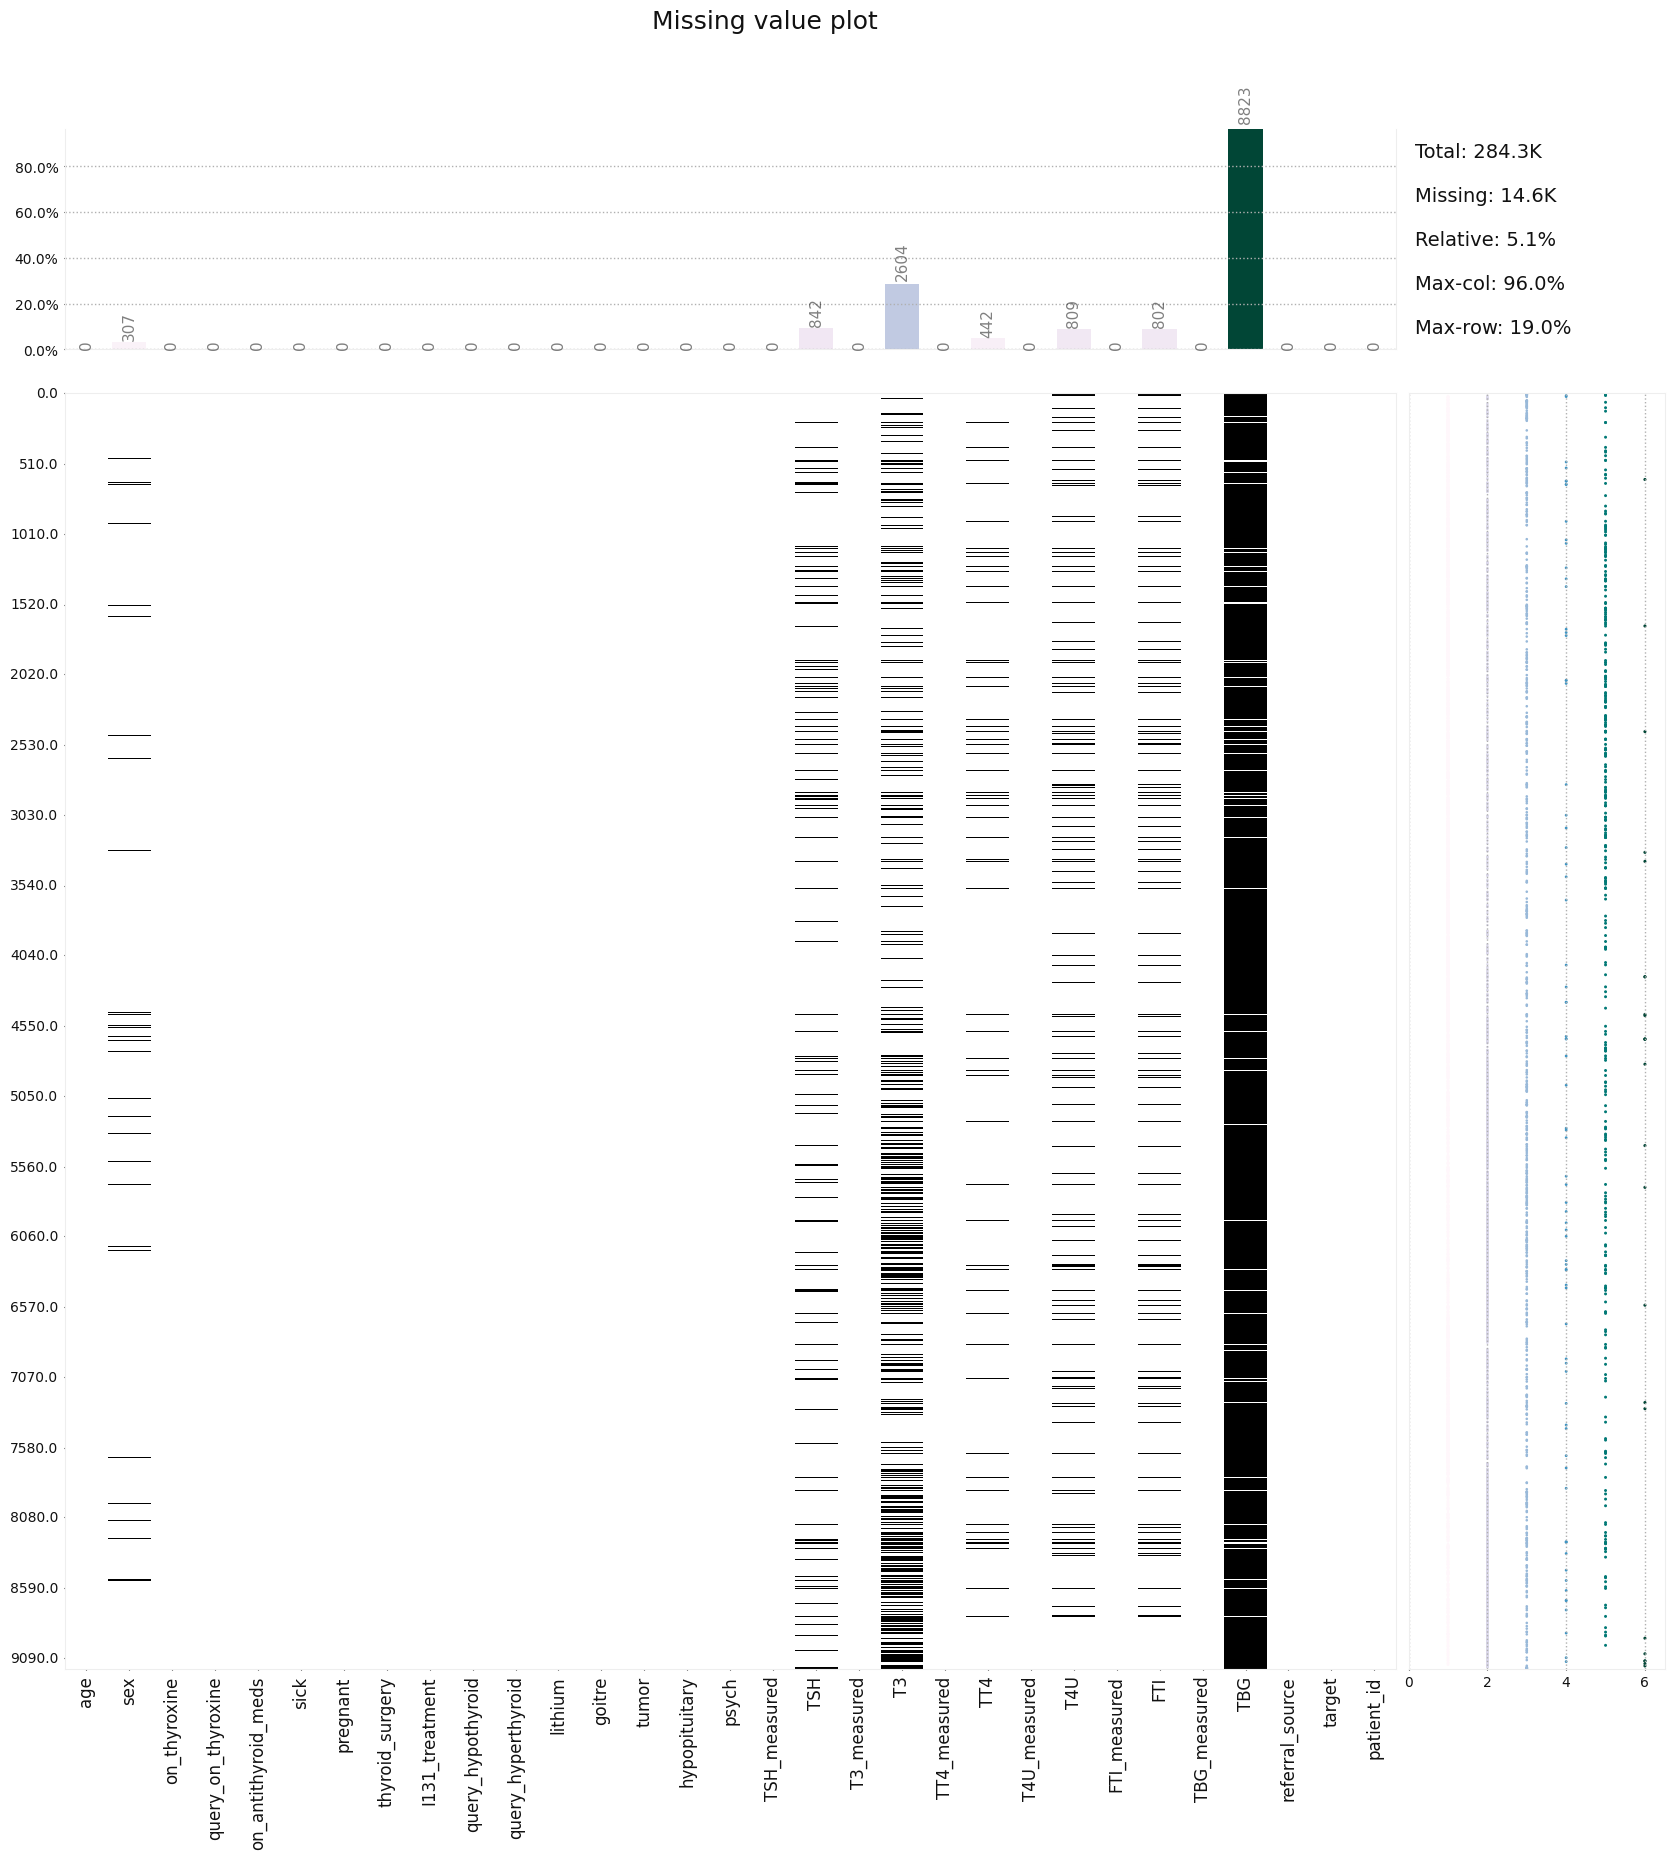

In [6]:
# View percent of N/A, sum of N/A, and the datatype of each column:

percent = round(df.isna().sum()/df.shape[0]*100, 1)
sum = df.isna().sum()
dtype = df.dtypes
na = pd.DataFrame({'% N/A': percent, '# N/A': sum, 'Datatype': dtype})
display(na)


# Identify missing value frequencies:

display(df.info())
dff.replace('', np.nan, inplace=True) #replace blanks with np.nan
display(klib.missingval_plot(dff))

<Axes: xlabel='age', ylabel='Density'>

GridSpec(6, 23)

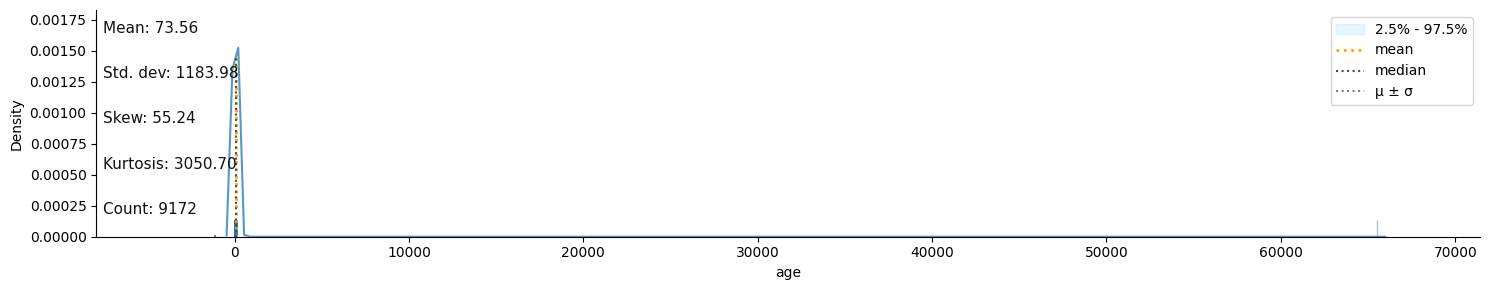

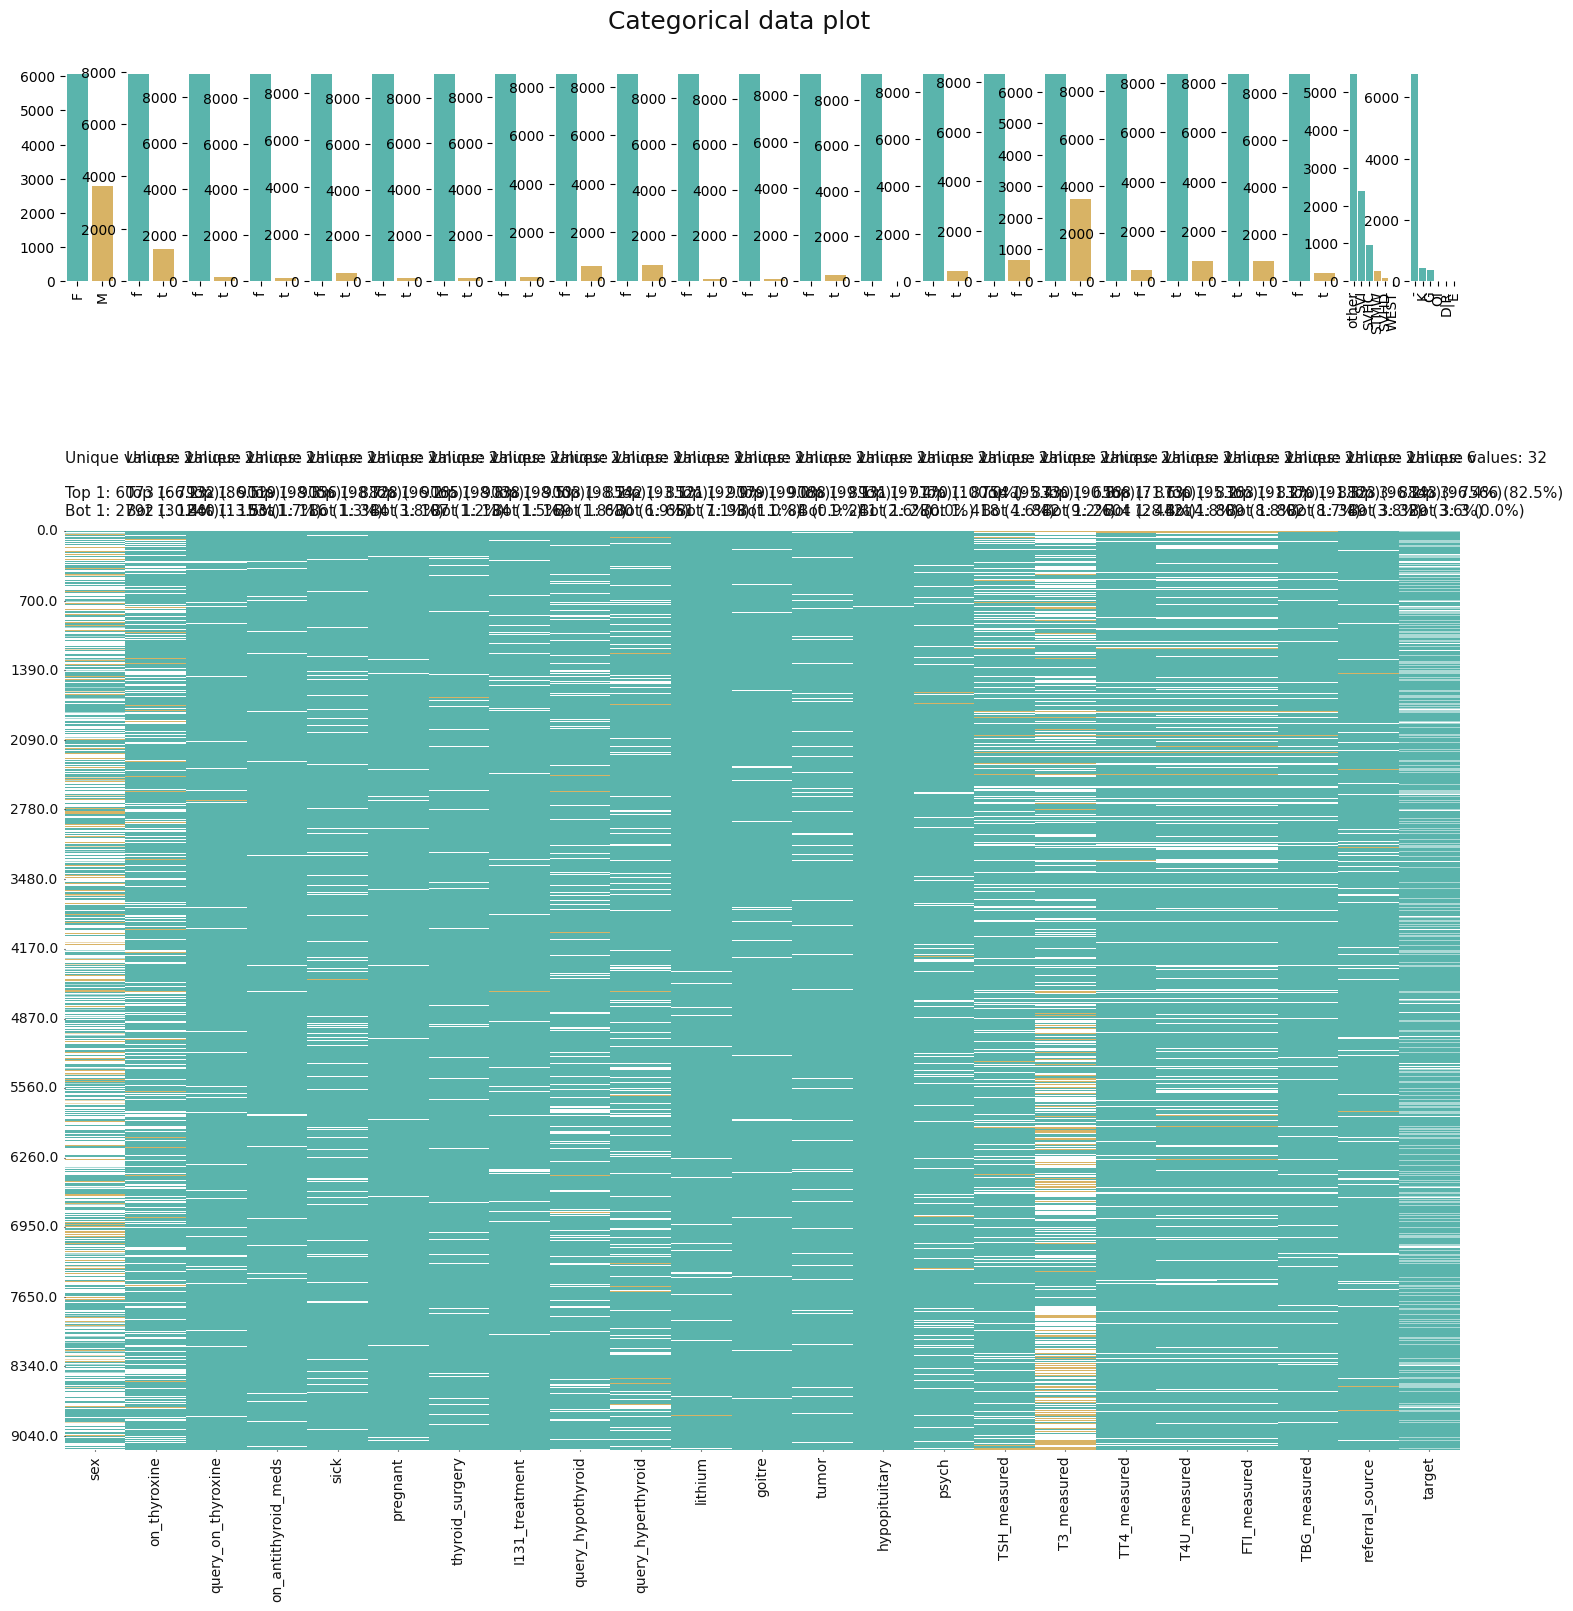

In [7]:
# Visualize distributions of numeric and categorical attributes:

display(klib.dist_plot(df))
display(klib.cat_plot(df))

In [8]:
# Measure of Centrality:

display(df.describe())
display(df['sex'].mode())
display(df['TSH'].mode())
display(df['T3'].mode())
display(df['TT4'].mode())
display(df['T4U'].mode())
display(df['FTI'].mode())

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


0    F
Name: sex, dtype: object

0    0.1
Name: TSH, dtype: float64

0    1.8
1    2.0
Name: T3, dtype: float64

0    101.0
Name: TT4, dtype: float64

0    0.96
Name: T4U, dtype: float64

0    107.0
Name: FTI, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  9172 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

GridSpec(6, 6)

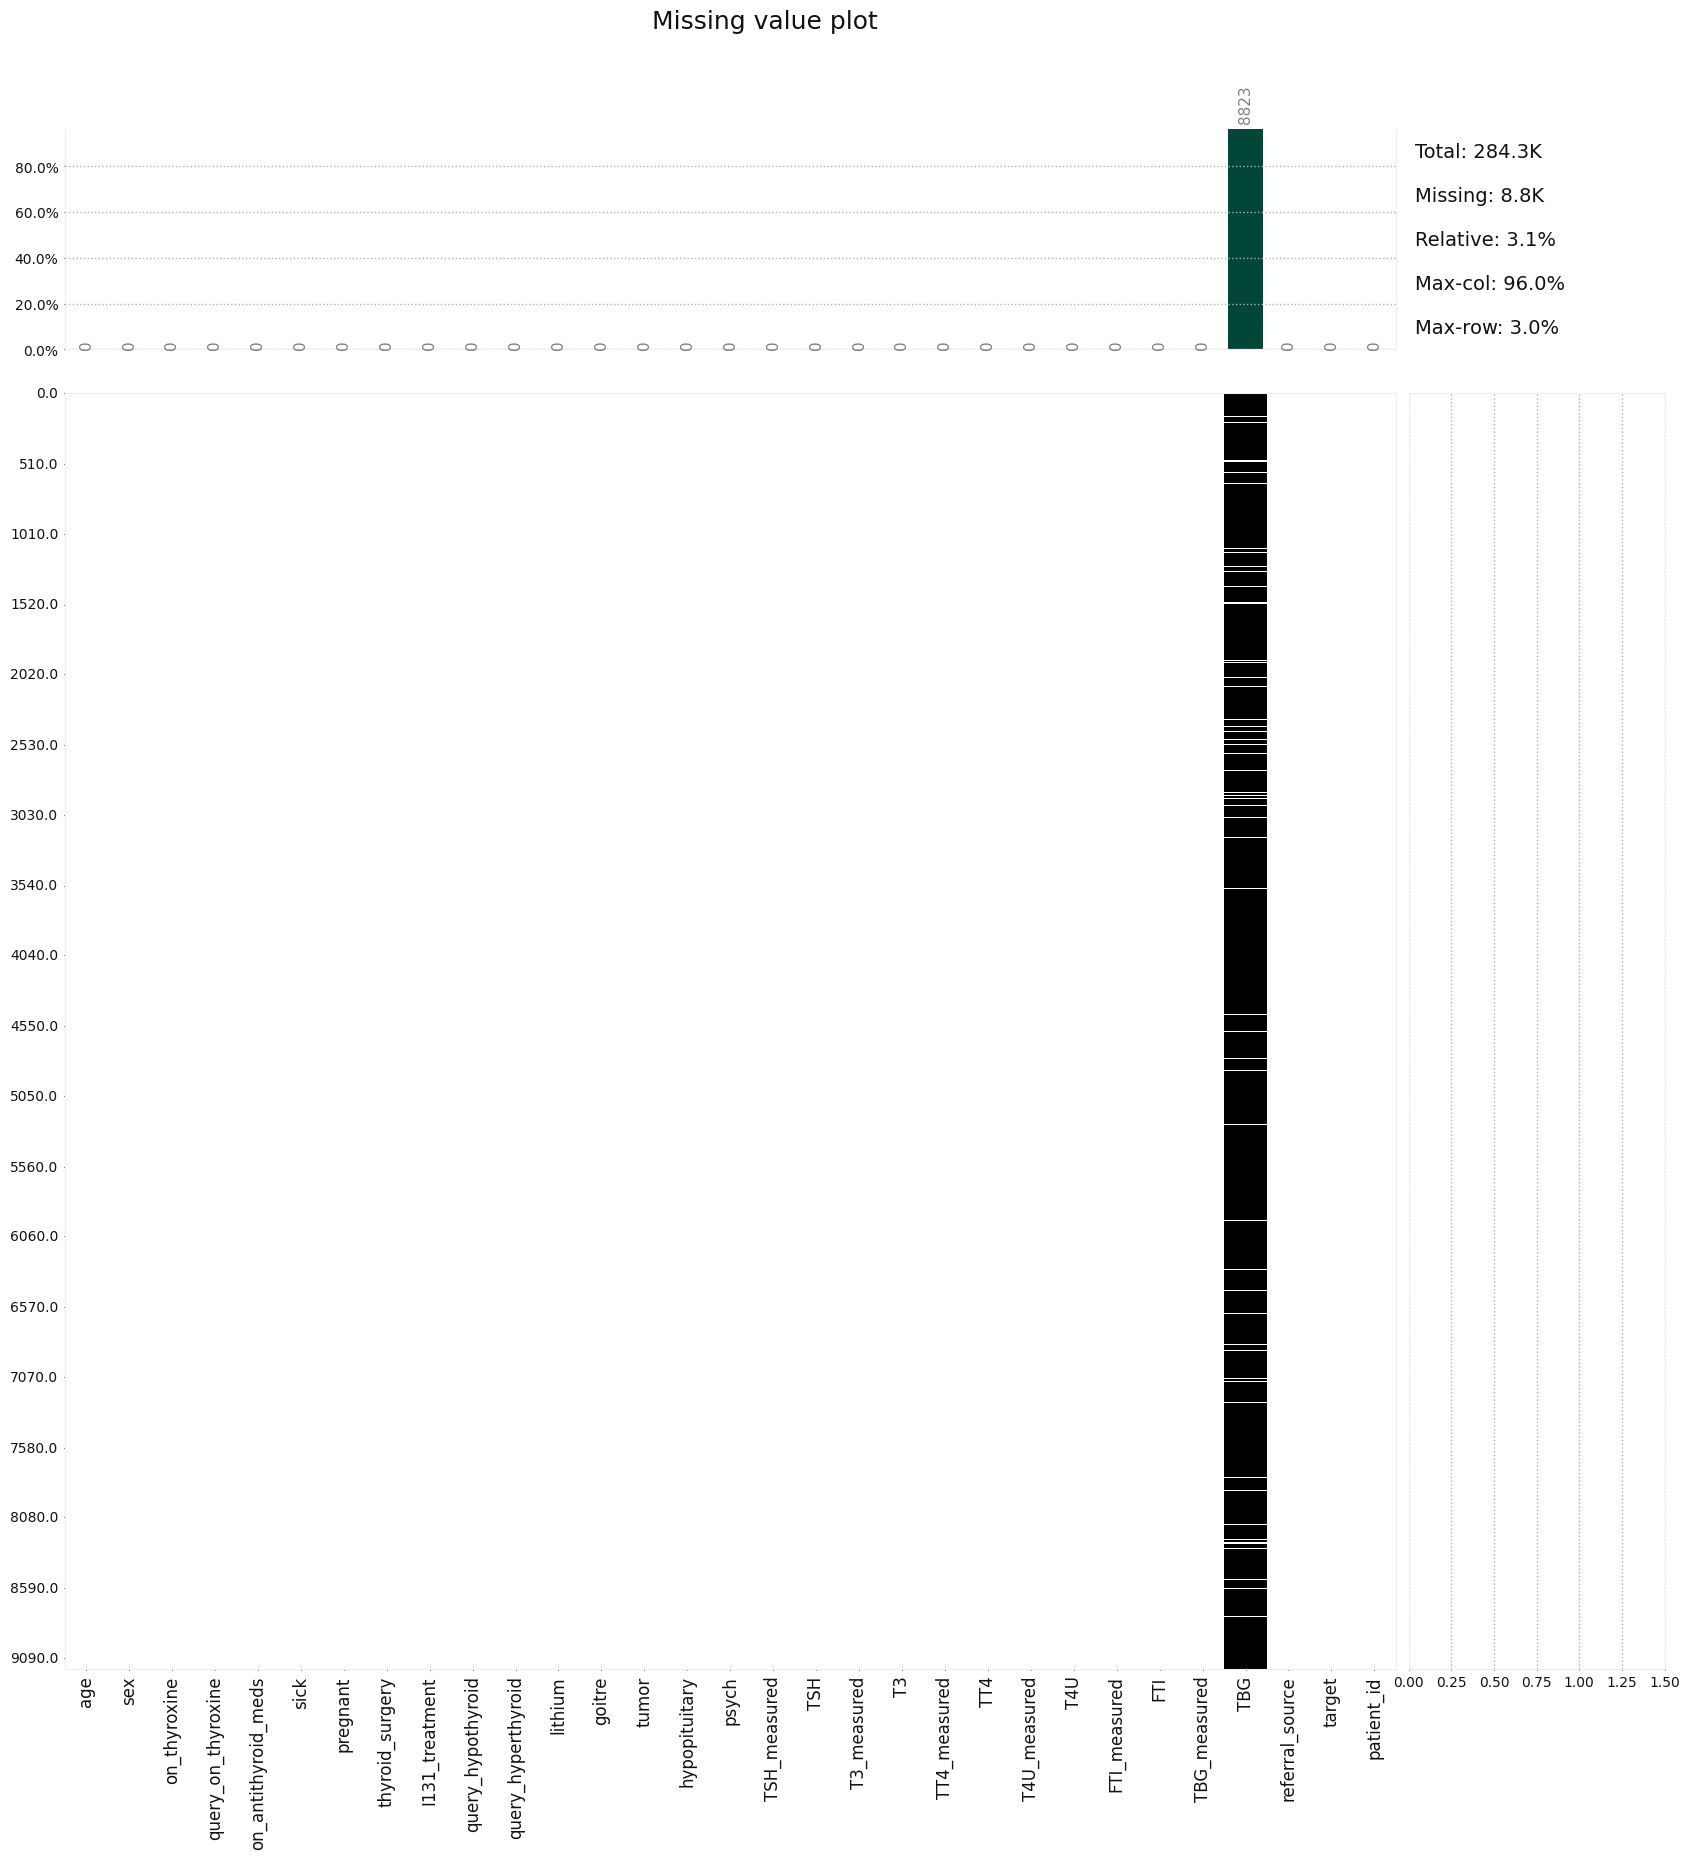

In [9]:
# Replace attribute having <= 40% missing data with appropriate measurement of centrality:
# TBG with >= 80% will be removed later

df['sex'] = df['sex'].replace(np.nan, 'F', regex = True) #Mode
df['TSH'] = df['TSH'].replace(np.nan, '1.4', regex = True) #Median
df['T3'] = df['T3'].replace(np.nan, '1.9', regex = True) #Median
df['TT4'] = df['TT4'].replace(np.nan, '101.0', regex = True) #Mode
df['T4U'] = df['T4U'].replace(np.nan, '0.96', regex = True) #Median
df['FTI'] = df['FTI'].replace(np.nan, '107.0', regex = True) #Median


display(df.info())
display(klib.missingval_plot(df))

In [10]:
# Correct numerical attribute's datatype back to float:

df['TSH'] = df['TSH'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TT4'] = df['TT4'].astype(float)
df['T4U'] = df['T4U'].astype(float)
df['FTI'] = df['FTI'].astype(float)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  9172 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

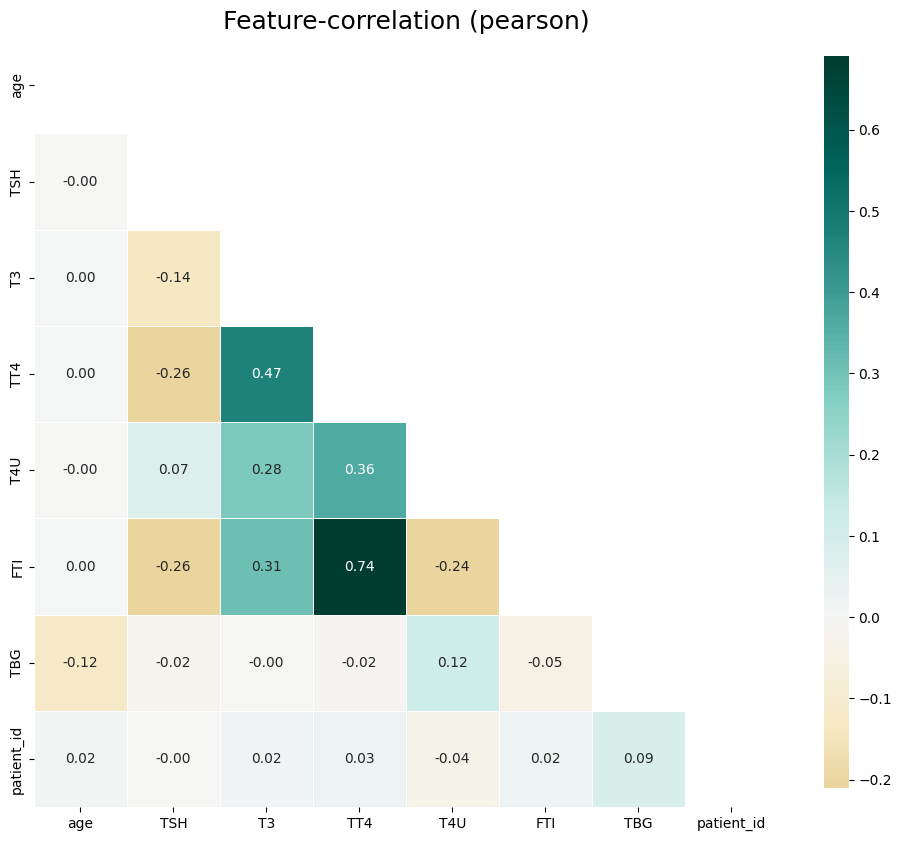

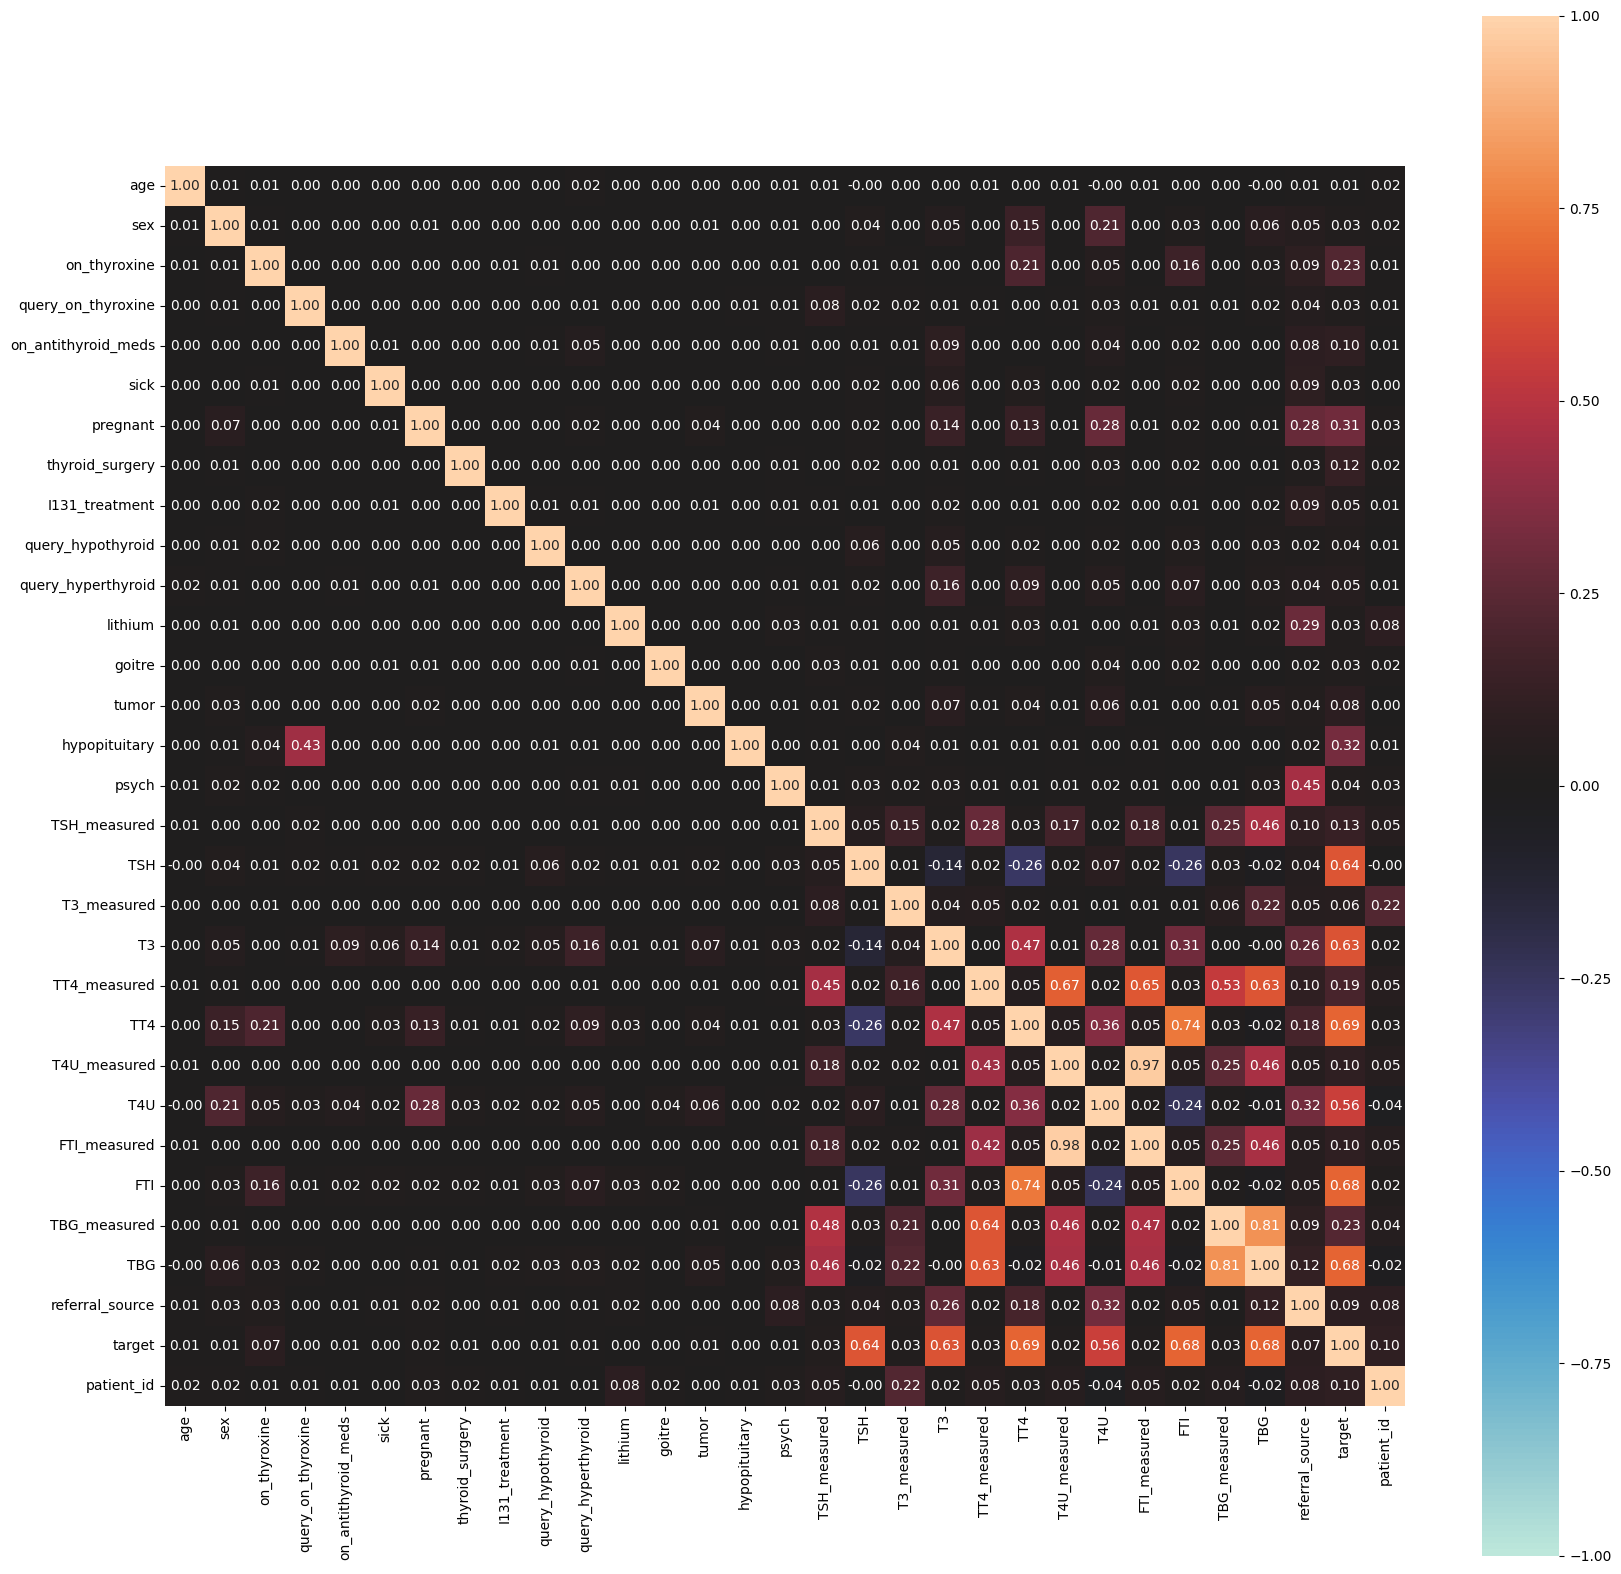

{'corr':                           age       sex  on_thyroxine  query_on_thyroxine  \
 age                  1.000000  0.014178      0.007095            0.002530   
 sex                  0.014178  1.000000      0.008941            0.001546   
 on_thyroxine         0.007095  0.013871      1.000000            0.000082   
 query_on_thyroxine   0.002530  0.011199      0.000385            1.000000   
 on_antithyroid_meds  0.002831  0.004556      0.000874            0.003156   
 sick                 0.002415  0.000255      0.008955            0.000211   
 pregnant             0.003892  0.067135      0.000815            0.001807   
 thyroid_surgery      0.002631  0.011320      0.002001            0.000175   
 I131_treatment       0.001645  0.000511      0.021638            0.003406   
 query_hypothyroid    0.004266  0.010997      0.020558            0.000538   
 query_hyperthyroid   0.017798  0.008833      0.002046            0.002474   
 lithium              0.002361  0.007453      0.000230  

In [11]:
# Correlation matrix for continues features:

klib.corr_plot(df)


# Correlation matric for categorical features:
# Dython library calculates correlation between categorical variables. Method applied is Theil U.

associations(df, nom_nom_assoc = "theil", multiprocessing = True, figsize = (20,20))

In [12]:
# Drop columns that have 80% missing values as well as those that aren't as relevant to the study:
# T4U_measured & FTI_measured are highly correlated lets drop one.

df = df.drop(['TBG', 'TBG_measured', 'query_hypothyroid',
              'query_hyperthyroid', 'patient_id',
              'referral_source', 'T4U_measured'], axis = 1)

In [13]:
# Final check for missing values:

percent = round(df.isna().sum()/df.shape[0]*100, 1)
sum = df.isna().sum()
dtype = df.dtypes
na = pd.DataFrame({'% N/A': percent, '# N/A': sum, 'Datatype': dtype})
na

,% N/A,# N/A,Datatype
age,0.0,0,int64
sex,0.0,0,object
on_thyroxine,0.0,0,object
query_on_thyroxine,0.0,0,object
on_antithyroid_meds,0.0,0,object
sick,0.0,0,object
pregnant,0.0,0,object
thyroid_surgery,0.0,0,object
I131_treatment,0.0,0,object
lithium,0.0,0,object


### Data Preparation: Target Transformation

In [14]:
# Replace target classes "-" to healthy:

df.loc[df["target"] == "-", "target"] = 'HLT'


# Combine appropriate target classes to identify hyperthyrodism:

df.loc[df["target"] == "A", "target"] = 'HeC'
df.loc[df["target"] == "B", "target"] = 'HeC'
df.loc[df["target"] == "C", "target"] = 'HeC'
df.loc[df["target"] == "D", "target"] = 'HeC'
df.loc[df["target"] == "D|R", "target"] = 'HeC'
df.loc[df["target"] == "AK", "target"] = 'HeC'
df.loc[df["target"] == "T", "target"] = 'HeC'
df.loc[df["target"] == "O", "target"] = 'HeC'
df.loc[df["target"] == "P", "target"] = 'HeC'
df.loc[df["target"] == "Q", "target"] = 'HeC'
df.loc[df["target"] == "J", "target"] = 'HeC'
df.loc[df["target"] == "LJ", "target"] = 'HeC'
df.loc[df["target"] == "KJ", "target"] = 'HeC'


    # These classes were classified using EDA plot TT4 vs T4U:

df.loc[df["target"] == "L", "target"] = 'HeC'
df.loc[df["target"] == "M", "target"] = 'HeC'
df.loc[df["target"] == "MK", "target"] = 'HeC'
df.loc[df["target"] == "N", "target"] = 'HeC'



# Combine appropriate target classes to identify hypothyrodism:

df.loc[df["target"] == "E", "target"] = 'HoC'
df.loc[df["target"] == "F", "target"] = 'HoC'
df.loc[df["target"] == "FK", "target"] = 'HoC'
df.loc[df["target"] == "G", "target"] = 'HoC'
df.loc[df["target"] == "GKJ", "target"] = 'HoC'
df.loc[df["target"] == "GI", "target"] = 'HoC'
df.loc[df["target"] == "GK", "target"] = 'HoC'
df.loc[df["target"] == "H", "target"] = 'HoC'
df.loc[df["target"] == "H|K", "target"] = 'HoC'
df.loc[df["target"] == "S", "target"] = 'HoC'
df.loc[df["target"] == "I", "target"] = 'HoC'
df.loc[df["target"] == "OI", "target"] = 'HoC'
df.loc[df["target"] == "MI", "target"] = 'HoC'
df.loc[df["target"] == "C|I", "target"] = 'HoC'


# Create others bucket:

df.loc[df["target"] == "K", "target"] = 'Others'
df.loc[df["target"] == "R", "target"] = 'Others'



display(df['target'].unique)

<bound method Series.unique of 0       HLT
1       HLT
2       HLT
3       HLT
4       HoC
       ... 
9167    HLT
9168    HLT
9169    HoC
9170    HLT
9171    HLT
Name: target, Length: 9172, dtype: object>

### Exploratory Data Analysis:

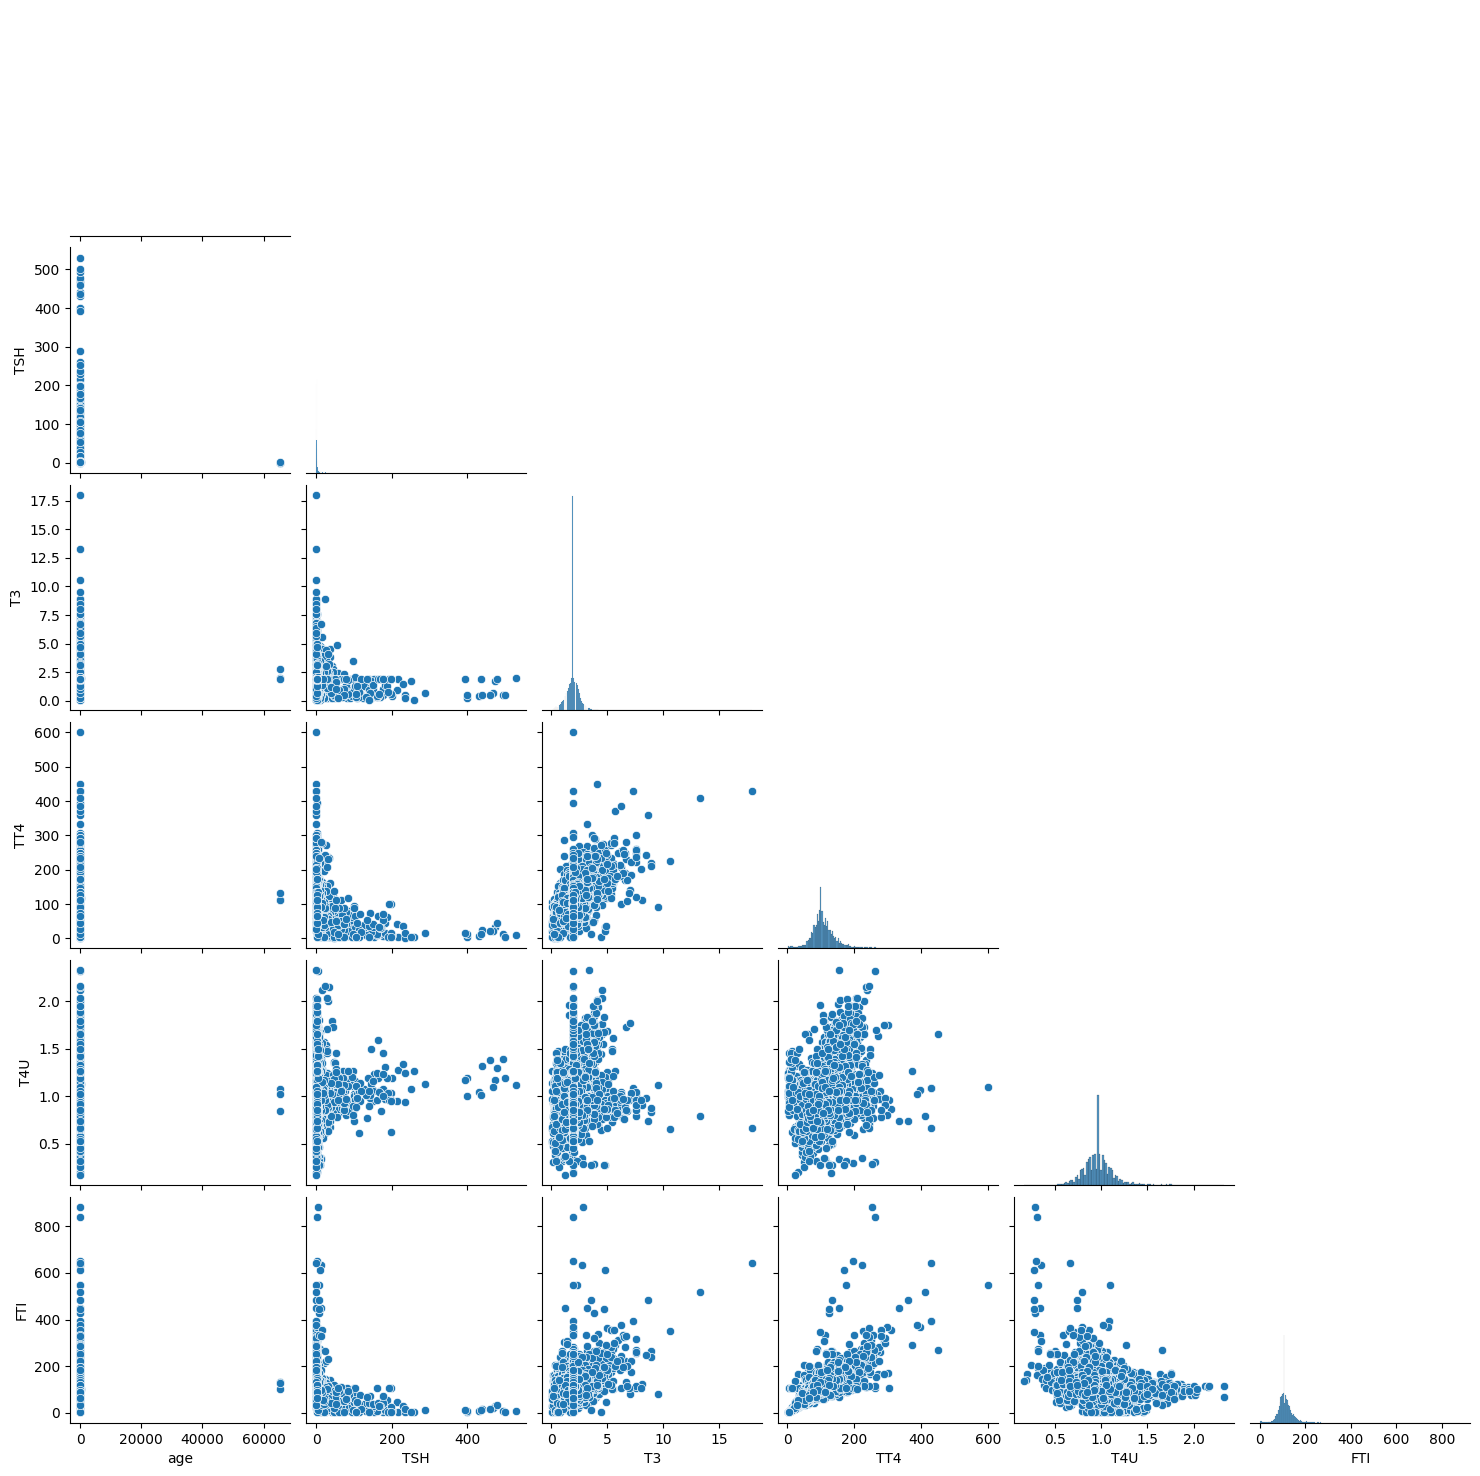

In [15]:
# General Pairplot of continues attributes:
# This plot was used to find a plot of analytes with a fairly spread-out population for target transformation:
sns.pairplot(df, corner=True)

Text(0.5, 1.0, 'Target Frequencies by Gender')

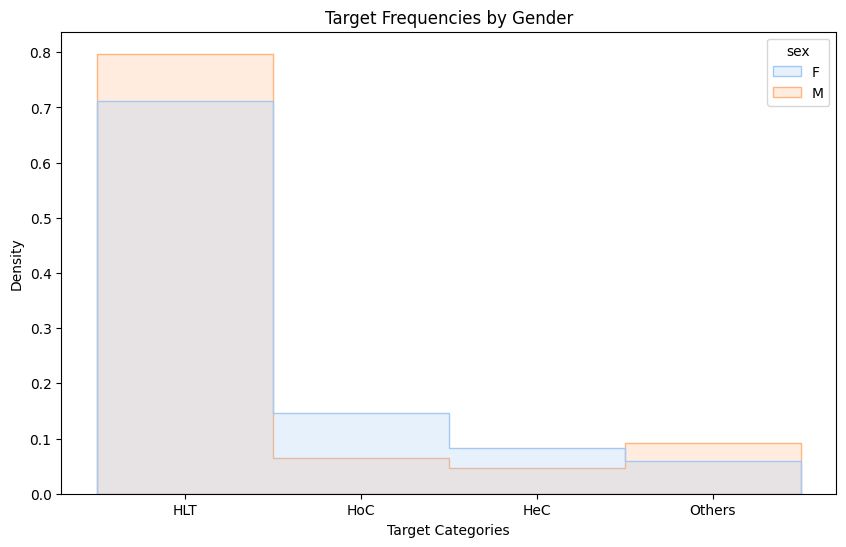

In [16]:
### Target Frequencies by Gender:

sns.histplot(data=df, x="target", hue="sex", stat="density",
             element="step", palette = "pastel",
             common_norm=False)

plt.gcf().set_size_inches(10, 6)
plt.xlabel('Target Categories')
plt.ylabel('Density')
plt.title("Target Frequencies by Gender")

Text(0.5, 1.0, 'TT4 Relation to T4U Differentiated by target')

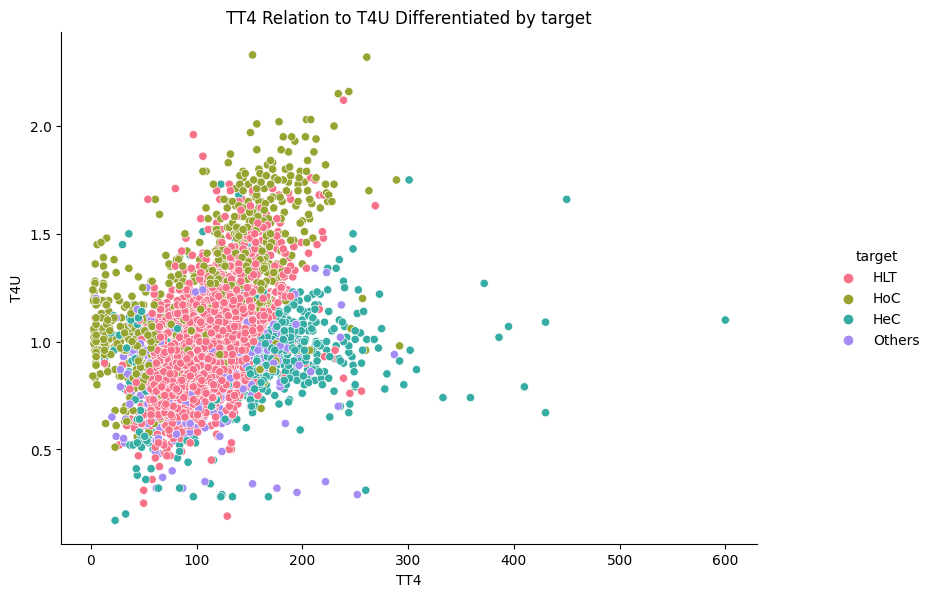

In [17]:
# TT4 Relation to T4U Differentiated by target:
# Plot used to categorize the different classes of the Target variable to either Hyper-, Hypo-, & others.

sns.relplot(data=df, x="TT4", y="T4U", hue="target", palette = "husl",
           kind="scatter")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('TT4')
plt.ylabel('T4U')
plt.title("TT4 Relation to T4U Differentiated by target")

Text(0.5, 1.0, 'TSH Relation to target by Gender')

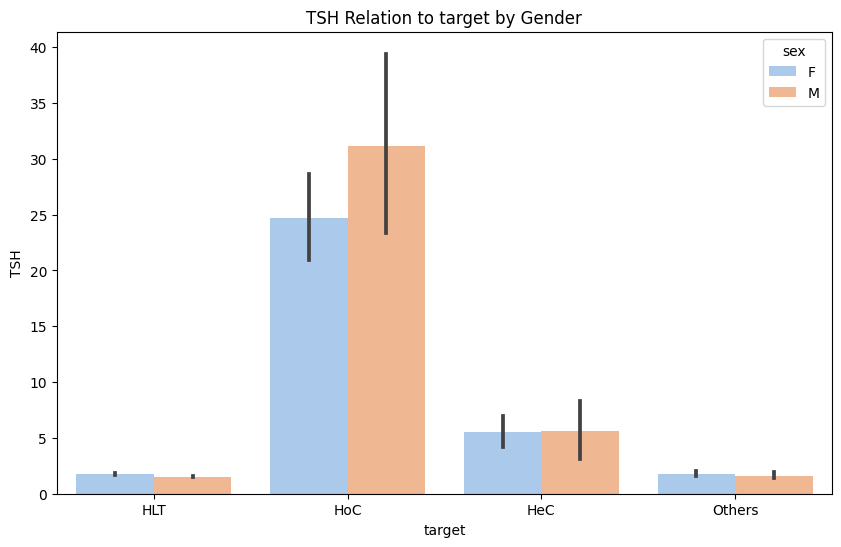

In [18]:
# TSH Relation to target by Gender

sns.barplot(data=df, x="target", y="TSH", hue="sex", palette = "pastel")
plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('TSH')
plt.title("TSH Relation to target by Gender")


Text(0.5, 1.0, 'TT4 Relation to target by Gender')

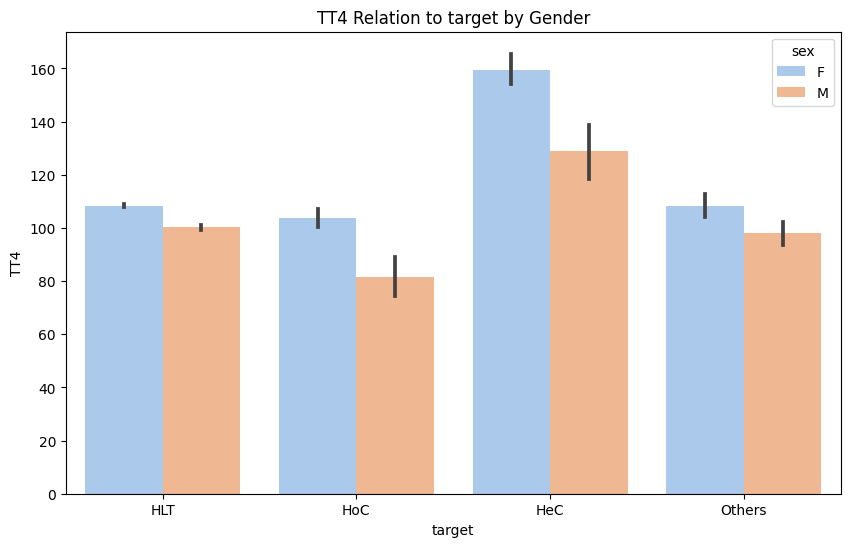

In [19]:
# TT4 Relation to target by Gender

sns.barplot(data=df, x="target", y="TT4", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('TT4')
plt.title("TT4 Relation to target by Gender")


Text(0.5, 1.0, 'T4U Relation to target by Gender')

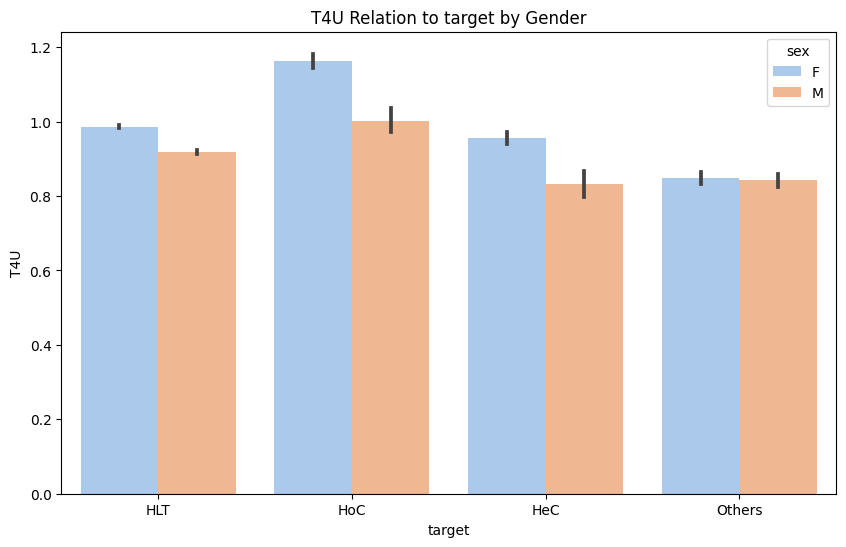

In [20]:
# T4U Relation to target by Gender

sns.barplot(data=df, x="target", y="T4U", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('T4U')
plt.title("T4U Relation to target by Gender")


Text(0.5, 1.0, 'FTI Relation to target by Gender')

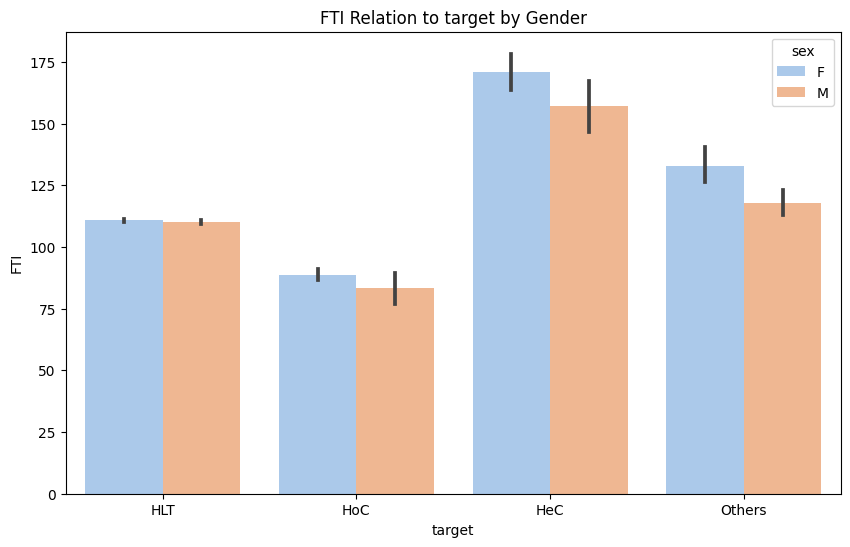

In [21]:
# FTI Relation to target by Gender

sns.barplot(data=df, x="target", y="FTI", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('FTI')
plt.title("FTI Relation to target by Gender")

### Data Preparation: Data Types Transformation

In [22]:
#change age to float because it is continuous and then scale using Standard Scaler():

df['age'] = df['age'].astype(float)

scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

In [23]:
#'sex' should be an int with only 0's and 1's.

display(df['sex'].value_counts())

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['sex'].value_counts()

F    6380
M    2792
Name: sex, dtype: int64

0    6380
1    2792
Name: sex, dtype: int64

In [24]:
# Lets transform the rest of the boolean features in the same manner as we did for sex.
# They are all currently objects so lets retrive them this way and transform them all
# with the label encoder in a similar manner to 'sex'

display("On Thyroxine:", df['on_thyroxine'].value_counts())
dtype_obj = df.select_dtypes(include=['object']).columns.tolist()

for col in dtype_obj:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

for col in dtype_obj:
    x = df[col].value_counts()
    print(x)

'On Thyroxine:'

f    7932
t    1240
Name: on_thyroxine, dtype: int64

0    7932
1    1240
Name: on_thyroxine, dtype: int64
0    9019
1     153
Name: query_on_thyroxine, dtype: int64
0    9056
1     116
Name: on_antithyroid_meds, dtype: int64
0    8828
1     344
Name: sick, dtype: int64
0    9065
1     107
Name: pregnant, dtype: int64
0    9038
1     134
Name: thyroid_surgery, dtype: int64
0    9003
1     169
Name: I131_treatment, dtype: int64
0    9079
1      93
Name: lithium, dtype: int64
0    9088
1      84
Name: goitre, dtype: int64
0    8931
1     241
Name: tumor, dtype: int64
0    9170
1       2
Name: hypopituitary, dtype: int64
0    8754
1     418
Name: psych, dtype: int64
1    8330
0     842
Name: TSH_measured, dtype: int64
1    6568
0    2604
Name: T3_measured, dtype: int64
1    8730
0     442
Name: TT4_measured, dtype: int64
1    8370
0     802
Name: FTI_measured, dtype: int64
0    6771
2    1113
1     656
3     632
Name: target, dtype: int64


### Data Preparation: Redundant Attributes

In [25]:
# Redundant?
# Due to the redududancy of information the following 4 columns will be dropped.

In [26]:
columns_to_drop = ['TSH_measured', 'T3_measured', 'TT4_measured', 'FTI_measured']
df= df.drop(columns=columns_to_drop).copy()

### Final Data Frame:

In [27]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,-0.037634,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,1.9,101.0,0.96,107.0,0
1,-0.037634,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,0.96,107.0,0
2,-0.027499,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,101.0,0.96,107.0,0
3,-0.031722,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,101.0,0.96,107.0,0
4,-0.035100,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,101.0,0.96,107.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,-0.014829,1,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,64.0,0.83,77.0,0
9168,-0.043547,1,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,91.0,0.92,99.0,0
9169,-0.003848,1,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,113.0,1.27,89.0,2
9170,-0.022431,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,75.0,0.85,88.0,0


### Partition Dataset to Train and Validation:

In [28]:
y = df['target']
y

X = df.drop(['target'], axis = 1)
X.shape

(9172, 19)

In [29]:
np.random.seed(22)
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.4)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, train_size=700/1200)
print("X_train shape:", X_train.shape, "X_valid shape:", X_valid.shape, "X_test shape:", X_test.shape)

X_train shape: (3668, 19) X_valid shape: (3210, 19) X_test shape: (2294, 19)


In [30]:
print("y_train shape:", y_train.shape, "y_valid shape:", y_valid.shape, "y_test shape:", y_test.shape)

y_train shape: (3668,) y_valid shape: (3210,) y_test shape: (2294,)


In [31]:
y_train

7189    0
6587    0
8999    0
6935    0
5888    0
       ..
4587    0
6646    0
5478    3
8548    0
6276    0
Name: target, Length: 3668, dtype: int64

### Standardize Train Data Sets:

In [32]:
# y_train copy:

y_train_c = y_train.copy()


# Standardize train data:

X_train_std = pd.DataFrame(stats.zscore(X_train))

display(X_train_std.head())


# Standardize valid data:

X_valid_std = pd.DataFrame(stats.zscore(X_valid))
X_valid_std.replace(np.nan, 0, inplace=True)
display(X_valid_std.head())

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
7189,-0.009368,-0.682233,-0.387561,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.078599,-0.987559,-0.825685,-1.271425,-0.145949
6587,-0.036193,-0.682233,2.580236,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.152366,0.470539,1.332652,0.371345,0.948227
8999,-0.020490,-0.682233,-0.387561,-0.139482,-0.110187,5.196152,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.198593,-0.059678,-0.142667,0.422681,-0.400408
6935,-0.038156,-0.682233,-0.387561,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.108106,0.470539,0.731596,0.011989,0.642876
5888,-0.028996,-0.682233,2.580236,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.083517,-0.059678,0.239823,-1.066078,0.973673


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
4225,-0.637756,1.545850,-0.406392,-0.130806,-0.104993,-0.209529,-0.097129,-0.103466,-0.124505,-0.09875,-0.093806,-0.171773,0.0,-0.222948,-0.192012,-0.340629,-0.204572,-0.209564,-0.121431
7224,-1.484138,-0.646893,-0.406392,-0.130806,-0.104993,-0.209529,-0.097129,-0.103466,-0.124505,-0.09875,-0.093806,-0.171773,0.0,-0.222948,-0.218395,20.944547,8.802171,-1.598117,12.416514
833,0.009477,1.545850,-0.406392,-0.130806,-0.104993,-0.209529,-0.097129,-0.103466,-0.124505,-0.09875,-0.093806,-0.171773,0.0,-0.222948,0.162011,-0.340629,-0.423581,-0.316376,-0.286095
4961,0.059264,-0.646893,-0.406392,-0.130806,-0.104993,-0.209529,-0.097129,-0.103466,-0.124505,-0.09875,-0.093806,-0.171773,0.0,4.485356,-0.072501,-1.646468,-0.888975,-1.331088,-0.215525
2318,0.855858,-0.646893,-0.406392,-0.130806,-0.104993,-0.209529,-0.097129,-0.103466,-0.124505,-0.09875,-0.093806,-0.171773,0.0,-0.222948,-0.158188,-0.079461,-0.204572,-0.049346,-0.168478


### Rebalance Train Dataset:

In [33]:
# Determine cluster train sample balance:

unique, counts = np.unique(y_train_c, return_counts=True)

class_frequency_counts = {
    unique[0]: counts[0],
    unique[1]: counts[1],
    unique[2]: counts[2],
    unique[3]: counts[3]
}

class_frequency_counts

{0: 2717, 1: 246, 2: 440, 3: 265}

In [34]:
# Train set resample/balanced:

oversample = RandomOverSampler(sampling_strategy='auto')
X_train_over, y_train_over = oversample.fit_resample(X_train_std, y_train_c)


# Show resampled frequency:
unique, counts = np.unique(y_train_over, return_counts=True)

oversampled_class_frequency_counts = {
    unique[0]: counts[0],
    unique[1]: counts[1],
    unique[2]: counts[2],
    unique[3]: counts[3]
}

oversampled_class_frequency_counts

{0: 2717, 1: 2717, 2: 2717, 3: 2717}

Final Train dataset: Standardized and Rebalanced

>X_train_over
>
>y_train_over
>
>X_valid_std
>
>y_valid


## Random Forest
## Used cross validation to find the optimal hyperparemeters.

In [35]:
n_estimators = [10, 30, 50, 70, 90, 110, 130, 160, 190, 220, 250]
max_d = [5, 7, 10, 13, 15, 18, 20, 22, 25]
## I want to limit max_depth to prevent overiftting. This is the lowest depth that still recorded max perfromace - a 92% weighted average in the three metrics.
minsplit = [2, 3, 4, 5]
# everything over 3 has reduced performance. Chose lowest to reduce overfitting
minleaf = [1, 2, 3, 4]

for nn in minleaf:
  rf = RandomForestClassifier(
    n_estimators=110,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    class_weight=None  # You can specify custom class weights if needed
)

  xxx = rf.fit(X_valid, y_valid)
  yyy = xxx.predict(X_test)
  print(pd.Series(yyy).value_counts())
  print(classification_report(y_test,yyy))

0    1776
2     241
1     144
3     133
dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1683
           1       0.86      0.74      0.80       167
           2       0.92      0.76      0.83       293
           3       0.78      0.69      0.73       151

    accuracy                           0.91      2294
   macro avg       0.87      0.79      0.83      2294
weighted avg       0.91      0.91      0.91      2294

0    1769
2     243
1     146
3     136
dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1683
           1       0.86      0.75      0.81       167
           2       0.92      0.76      0.83       293
           3       0.79      0.72      0.75       151

    accuracy                           0.92      2294
   macro avg       0.88      0.80      0.84      2294
weighted avg       0.92      0.92      0.91      2294

0    1775
2     243
1   

## initale model with the optimal hyperparameters

In [36]:
rf = RandomForestClassifier(
    n_estimators=110,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    class_weight=None  # You can specify custom class weights if needed
)

In [37]:
  model_randomforest = rf.fit(X_valid, y_valid)
  predictions_rf = model_randomforest.predict(X_test)
  print(pd.Series(predictions_rf).value_counts())
  print(classification_report(y_test,predictions_rf))

0    1778
2     242
1     148
3     126
dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1683
           1       0.87      0.77      0.82       167
           2       0.93      0.76      0.84       293
           3       0.82      0.68      0.74       151

    accuracy                           0.92      2294
   macro avg       0.89      0.80      0.84      2294
weighted avg       0.92      0.92      0.91      2294



## Logistic Regression CV

In [38]:
# LogisticRegressionCV with L2 penalty (solver='lbfgs', cv=5, max_iter=500):

lr_CV = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500)
lr_CV.fit(X_train_over, y_train_over)


# Print intercept and coefficients:

print('intercept ', lr_CV.intercept_)
print(pd.DataFrame({'coeff': lr_CV.coef_[0]}, index=X.columns))

intercept  [ 0.60000543 -0.2472558   0.26371067 -0.61646031]
                        coeff
age                  0.205211
sex                  0.071698
on_thyroxine         0.204008
query_on_thyroxine  -0.009776
on_antithyroid_meds -0.042453
sick                -0.018108
pregnant            -0.032739
thyroid_surgery      0.292597
I131_treatment      -0.003913
lithium              0.137328
goitre               0.083269
tumor               -0.055874
hypopituitary       -0.056385
psych                0.274602
TSH                 -3.603975
T3                   0.302623
TT4                 -0.103286
T4U                 -0.064596
FTI                 -0.540056


In [39]:
# Predictions on validation set:

lr_CV_pred = lr_CV.predict(X_valid_std)

lrCV_pred_result = pd.DataFrame({'Predicted': lr_CV_pred, 'Actual': y_valid})
display(lrCV_pred_result.head())


# Confusion matrix:

display(pd.crosstab(y_valid, lr_CV_pred, rownames=['True'], colnames=['Predicted'], margins=True))


# Classification report:

print(classification_report(y_valid,lr_CV_pred))

,Predicted,Actual
4225,0,0
7224,1,1
833,2,2
4961,3,3
2318,0,0


Predicted,0,1,2,3,All
True,,,,,
0,1539,232,295,305,2371
1,16,201,7,19,243
2,50,24,284,22,380
3,34,13,3,166,216
All,1639,470,589,512,3210


              precision    recall  f1-score   support

           0       0.94      0.65      0.77      2371
           1       0.43      0.83      0.56       243
           2       0.48      0.75      0.59       380
           3       0.32      0.77      0.46       216

    accuracy                           0.68      3210
   macro avg       0.54      0.75      0.59      3210
weighted avg       0.80      0.68      0.71      3210



LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.603,1.000,0.794,321.0,204.0,134.0,165.1,858,63.551,321.0,204.0,858,134.0,10.0,12.356,51.969,5.652,6.704,1.236
1,2,0.256,0.600,0.421,321.0,173.0,229.0,165.1,596,53.894,642.0,377.0,1454,363.0,20.0,22.835,88.068,15.310,7.525,1.142
2,3,0.132,0.252,0.183,321.0,160.0,247.0,165.1,197,49.844,963.0,537.0,1651,610.0,30.0,32.526,100.000,25.728,6.798,1.084
3,4,0.089,0.132,0.107,321.0,92.0,278.0,165.1,0,28.660,1284.0,629.0,1651,888.0,40.0,38.098,100.000,37.453,0.645,0.952
4,5,0.065,0.089,0.075,321.0,98.0,273.0,165.1,0,30.530,1605.0,727.0,1651,1161.0,50.0,44.034,100.000,48.967,-4.933,0.881
5,6,0.051,0.065,0.059,321.0,82.0,281.0,165.1,0,25.545,1926.0,809.0,1651,1442.0,60.0,49.001,100.000,60.818,-11.817,0.817
6,7,0.037,0.051,0.044,321.0,54.0,297.0,165.1,0,16.822,2247.0,863.0,1651,1739.0,70.0,52.271,100.000,73.345,-21.074,0.747
7,8,0.023,0.037,0.030,321.0,131.0,266.0,165.1,0,40.810,2568.0,994.0,1651,2005.0,80.0,60.206,100.000,84.563,-24.357,0.753
8,9,0.007,0.023,0.015,321.0,364.0,176.0,165.1,0,113.396,2889.0,1358.0,1651,2181.0,90.0,82.253,100.000,91.987,-9.734,0.914
9,10,0.000,0.007,0.002,321.0,293.0,190.0,165.1,0,91.277,3210.0,1651.0,1651,2371.0,100.0,100.000,100.000,100.000,0.000,1.000


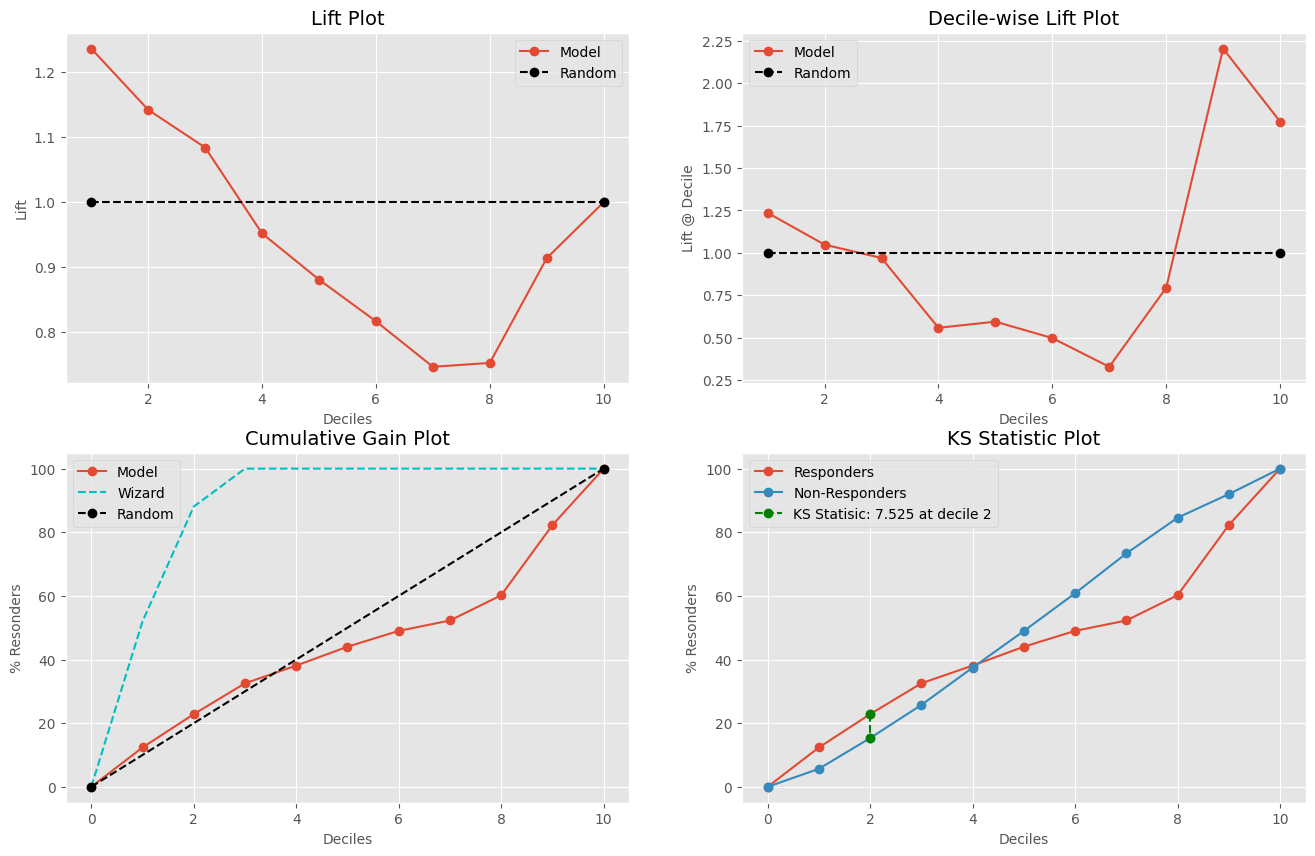

In [40]:
# Metrics Report:

lr_CV_prob = lr_CV.predict_proba(X_valid_std)

kds.metrics.report(y_valid,lr_CV_prob[:,1],plot_style='ggplot')

## Neural Network

In [41]:
# set random seed
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
# define the neural network model
NN_model = Sequential()
NN_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(16, activation='relu'))
NN_model.add(Dense(8, activation='relu'))
NN_model.add(Dense(4, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))

# Print model architecture
sequential_model_to_ascii_printout(NN_model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          19
               Dense   XXXXX -------------------      1280    31.5%
                relu   #####          64
               Dense   XXXXX -------------------      2080    51.2%
                relu   #####          32
               Dense   XXXXX -------------------       528    13.0%
                relu   #####          16
               Dense   XXXXX -------------------       136     3.3%
                relu   #####           8
               Dense   XXXXX -------------------        36     0.9%
                relu   #####           4
               Dense   XXXXX -------------------         5     0.1%
             sigmoid   #####           1


In [43]:
# compile the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = NN_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/15
115/115 [==============================] - 3s 10ms/step - loss: 0.9118 - accuracy: 0.6341 - val_loss: 0.6933 - val_accuracy: 0.0645
Epoch 2/15
115/115 [==============================] - 1s 7ms/step - loss: 0.6702 - accuracy: 0.5690 - val_loss: 0.6649 - val_accuracy: 0.6589
Epoch 3/15
115/115 [==============================] - 1s 6ms/step - loss: 0.6555 - accuracy: 0.5848 - val_loss: 0.6497 - val_accuracy: 0.6632
Epoch 4/15
115/115 [==============================] - 1s 6ms/step - loss: 0.6491 - accuracy: 0.4872 - val_loss: 0.6679 - val_accuracy: 0.7249
Epoch 5/15
115/115 [==============================] - 1s 5ms/step - loss: 0.6170 - accuracy: 0.5722 - val_loss: 0.6215 - val_accuracy: 0.6433
Epoch 6/15
115/115 [==============================] - 1s 6ms/step - loss: 0.6218 - accuracy: 0.4929 - val_loss: 0.6166 - val_accuracy: 0.6576
Epoch 7/15
115/115 [==============================] - 0s 4ms/step - loss: 0.5934 - accuracy: 0.5330 - val_loss: 0.5995 - val_accuracy: 0.4835
Epoch

In [44]:
# evaluate model on the test set
test_loss, test_accuracy = NN_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

72/72 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.6003
Test Accuracy: 60.03%


### Evaluate Neural Network Model

In [45]:
# make predictions on test data
y_pred = NN_model.predict(X_test)

# convert predictions to class labels (use argmax for multiclass classification)
y_pred_labels = y_pred.argmax(axis=1)

72/72 [==============================] - 0s 2ms/step


In [46]:
# generate classification report
report = classification_report(y_test, y_pred_labels, target_names=["Class 0", "Class 1", "Class 2", "Class 3"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.73      1.00      0.85      1683
     Class 1       0.00      0.00      0.00       167
     Class 2       0.00      0.00      0.00       293
     Class 3       0.00      0.00      0.00       151

    accuracy                           0.73      2294
   macro avg       0.18      0.25      0.21      2294
weighted avg       0.54      0.73      0.62      2294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ensemble Method #1

In [47]:
import numpy
numpy.unique(predictions_rf)
len(predictions_rf)

2294

In [48]:
lr_CV_pred
numpy.unique(lr_CV_pred)
len(lr_CV_pred)

3210

In [49]:
y_pred_labels
numpy.unique(y_pred_labels)
len(y_pred_labels)

2294

In [50]:
stacked_predictions = numpy.column_stack((predictions_rf, y_pred_labels))

In [51]:
# Split the stacked predictions for meta-model training and validation
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(stacked_predictions, y_test, test_size=0.2, random_state=42)

# train ensemble model
meta_model = LogisticRegression()
meta_model.fit(X_train_meta, y_train_meta)

meta_pred = meta_model.predict(X_val_meta)

# measure accuracy
meta_model_score = meta_model.score(X_val_meta, y_val_meta)
print(f"Meta-model accuracy: {meta_model_score:.4f}")

#accuracy_score(y_val_meta, meta_pred)
classification_report(y_val_meta, meta_pred)

Meta-model accuracy: 0.8105


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.86      0.98      0.91       335\n           1       0.00      0.00      0.00        34\n           2       0.57      0.76      0.65        58\n           3       0.00      0.00      0.00        32\n\n    accuracy                           0.81       459\n   macro avg       0.36      0.43      0.39       459\nweighted avg       0.70      0.81      0.75       459\n'

# Table

### Conclusion

#### Logistic Regression:




#### Random Forest:

#### Neural Network:

#### Ensemble: